# fz-Cast3m Example Usage

This notebook demonstrates how to use the fz-Cast3m plugin for parametric studies with Cast3m finite element software.

## Prerequisites

- fz framework installed: `pip install git+https://github.com/Funz/fz.git`
- Cast3m software installed (castem2000 or cast3m in PATH)
- This repository cloned

In [1]:
import fz
import pandas as pd
import os

# Change to repository root if needed
if not os.path.exists('.fz'):
    os.chdir('..')

## 1. Parse Variables from Input File

First, let's examine what variables are in our parametric beam example:

In [2]:
# Parse variables from input file
variables = fz.fzi('examples/Cast3m/poutre_parametric.dgibi', 'Cast3m')
print("Variables found in input file:")
for var, info in variables.items():
    print(f"  - {var}: {info}")

Variables found in input file:
  - F: None
  - haut: None
  - larg: None
  - long: None


## 2. Compile Input File with Specific Values

Now let's compile the input file with specific parameter values:

In [3]:
# Compile with specific values
fz.fzc(
    'examples/Cast3m/poutre_parametric.dgibi',
    {'long': 0.30, 'haut': 0.001, 'larg': 0.01, 'F': 1.0},
    'Cast3m',
    output_dir='compiled_example'
)

# Show the compiled file
import glob
compiled_files = glob.glob('compiled_example/**/poutre_parametric.dgibi', recursive=True)
if compiled_files:
    print("Compiled file:")
    with open(compiled_files[0]) as f:
        for i, line in enumerate(f, 1):
            print(f"{i:3d}: {line.rstrip()}")
            if i > 15:  # Show first 15 lines
                print("    ...")
                break

Compiled file:
  1: * POUTRE CONSOLE EN FLEXION SIMPLE - Version parametrique
  2: *
  3: *                          | F
  4: *                          |
  5: *  |                       |
  6: *  |P1                     v P2
  7: *  |------------------------
  8: *  |
  9: *  |
 10: *
 11: * Formule analytique de la flèche en fonction de l'effort :
 12: * u = F*L^3/(3*E*I)
 13: * où F est la force, L la longueur,
 14: *    E le module de Young (210e9 pour l'acier),
 15: *    I le moment d'inertie de la section de la poutre (largeur*hauteur^3/12)
 16: 
    ...


## 3. Run Parametric Study

Now let's run a parametric study with multiple parameter values.

**Note**: This requires Cast3m to be installed. If Cast3m is not available, this cell will fail.

In [23]:
# Run parametric study
# We'll vary the length and force, keeping other parameters constant
results = fz.fzr(
    input_path='examples/Cast3m/poutre_parametric.dgibi',
    input_variables={
        'long': [0.20, 0.25, 0.30, 0.35, 0.40],  # 5 values
        'haut': 0.001,                            # constant
        'larg': 0.01,                             # constant
        'F': [0.5, 1.0, 1.5]                     # 3 values
    },
    model='Cast3m',
    calculators='localhost_Cast3m',
    results_dir='notebook_results'
)

print(f"\nTotal number of runs: {len(results)}")
print("\nFirst few results:")
results

                         .

Total number of runs: 15

First few results:


,long,haut,larg,F,outputs,path,calculator,status,error,command
0,0.20,0.001,0.01,0.5,"{'long': 0.2, 'dep_P2': -0.00761905, 'err': ''...","notebook_results/long=0.2,haut=0.001,larg=0.01...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
1,0.20,0.001,0.01,1.0,"{'long': 0.2, 'dep_P2': -0.0152381, 'err': '',...","notebook_results/long=0.2,haut=0.001,larg=0.01...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
2,0.20,0.001,0.01,1.5,"{'long': 0.2, 'dep_P2': -0.0228571, 'err': '',...","notebook_results/long=0.2,haut=0.001,larg=0.01...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
3,0.25,0.001,0.01,0.5,"{'long': 0.25, 'dep_P2': -0.014881, 'err': '',...","notebook_results/long=0.25,haut=0.001,larg=0.0...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
4,0.25,0.001,0.01,1.0,"{'long': 0.25, 'dep_P2': -0.0297619, 'err': ''...","notebook_results/long=0.25,haut=0.001,larg=0.0...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
5,0.25,0.001,0.01,1.5,"{'long': 0.25, 'dep_P2': -0.0446429, 'err': ''...","notebook_results/long=0.25,haut=0.001,larg=0.0...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
6,0.30,0.001,0.01,0.5,"{'long': 0.3, 'dep_P2': -0.0257143, 'err': '',...","notebook_results/long=0.3,haut=0.001,larg=0.01...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
7,0.30,0.001,0.01,1.0,"{'long': 0.3, 'dep_P2': -0.0514286, 'err': '',...","notebook_results/long=0.3,haut=0.001,larg=0.01...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
8,0.30,0.001,0.01,1.5,"{'long': 0.3, 'dep_P2': -0.0771429, 'err': '',...","notebook_results/long=0.3,haut=0.001,larg=0.01...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...
9,0.35,0.001,0.01,0.5,"{'long': 0.35, 'dep_P2': -0.0408333, 'err': ''...","notebook_results/long=0.35,haut=0.001,larg=0.0...",sh://bash .fz/calculators/Cast3m.sh#6549a647,done,None,bash /home/richet/Sync/Open/Funz/github/fz-Cas...


In [24]:
# read each elemnt of results['outputs'] as dict, and append each key in results (new column)
outputs_df = pd.DataFrame(results['outputs'].tolist())
final_results = pd.concat([results.drop(columns=['outputs']), outputs_df], axis=1)
# remove redundant columns (same name)
final_results = final_results.loc[:,~final_results.columns.duplicated()]
results=final_results
print(results.head())

   long   haut  larg    F                                               path  \
0  0.20  0.001  0.01  0.5  notebook_results/long=0.2,haut=0.001,larg=0.01...   
1  0.20  0.001  0.01  1.0  notebook_results/long=0.2,haut=0.001,larg=0.01...   
2  0.20  0.001  0.01  1.5  notebook_results/long=0.2,haut=0.001,larg=0.01...   
3  0.25  0.001  0.01  0.5  notebook_results/long=0.25,haut=0.001,larg=0.0...   
4  0.25  0.001  0.01  1.0  notebook_results/long=0.25,haut=0.001,larg=0.0...   

                                     calculator status error  \
0  sh://bash .fz/calculators/Cast3m.sh#6549a647   done  None   
1  sh://bash .fz/calculators/Cast3m.sh#6549a647   done  None   
2  sh://bash .fz/calculators/Cast3m.sh#6549a647   done  None   
3  sh://bash .fz/calculators/Cast3m.sh#6549a647   done  None   
4  sh://bash .fz/calculators/Cast3m.sh#6549a647   done  None   

                                             command    dep_P2 err  \
0  bash /home/richet/Sync/Open/Funz/github/fz-Cas... -0.007619  

## 4. Analyze Results

Let's analyze the relationship between parameters and outputs:

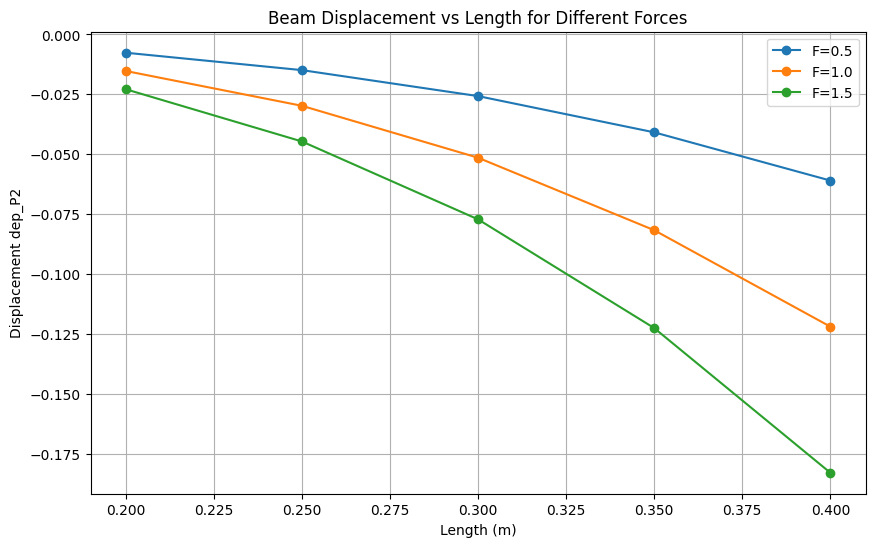

In [25]:
import matplotlib.pyplot as plt

# Plot displacement vs length for different forces
fig, ax = plt.subplots(figsize=(10, 6))

for force in results['F'].unique():
    data = results[results['F'] == force].sort_values('long')
    ax.plot(data['long'], data['dep_P2'], marker='o', label=f'F={force}')

ax.set_xlabel('Length (m)')
ax.set_ylabel('Displacement dep_P2')
ax.set_title('Beam Displacement vs Length for Different Forces')
ax.legend()
ax.grid(True)
plt.show()

## 5. Summary Statistics

Let's compute some summary statistics:

In [26]:
print("Summary statistics for dep_P2:")
print(results.groupby('F')['dep_P2'].describe())

Summary statistics for dep_P2:
     count  mean      std       min       25%       50%       75%       max
F                                                                          
0.5    5.0 -0.03  0.02135 -0.060952 -0.040833 -0.025714 -0.014881 -0.007619
1.0    5.0 -0.06  0.04270 -0.121905 -0.081667 -0.051429 -0.029762 -0.015238
1.5    5.0 -0.09  0.06405 -0.182857 -0.122500 -0.077143 -0.044643 -0.022857


## Cleanup

Remove temporary files:

In [ ]:
import shutil

# Remove temporary directories
for directory in ['compiled_example', 'notebook_results']:
    if os.path.exists(directory):
        shutil.rmtree(directory)
        print(f"Removed {directory}")